Day1 Analysis

In [2]:
import sys
sys.path.append("../src")

from fetch_data import get_stock_data
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np

In [3]:
aapl = get_stock_data("AAPL") 
msft = get_stock_data("MSFT")
nvda = get_stock_data("NVDA")

print("AAPL:\n", aapl.head())
print("MSFT:\n", msft.head())


/Users/arnavsharma/Documents/Dev/stat_arb_sim/notebooks/../src/fetch_data.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start, end=end, progress=False)
/Users/arnavsharma/Documents/Dev/stat_arb_sim/notebooks/../src/fetch_data.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start, end=end, progress=False)
/Users/arnavsharma/Documents/Dev/stat_arb_sim/notebooks/../src/fetch_data.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start, end=end, progress=False)


AAPL:
 Date
2018-01-02    40.426819
2018-01-03    40.419792
2018-01-04    40.607544
2018-01-05    41.069862
2018-01-08    40.917305
Name: (Close, AAPL), dtype: float64
MSFT:
 Date
2018-01-02    79.328514
2018-01-03    79.697723
2018-01-04    80.399185
2018-01-05    81.395981
2018-01-08    81.479027
Name: (Close, MSFT), dtype: float64


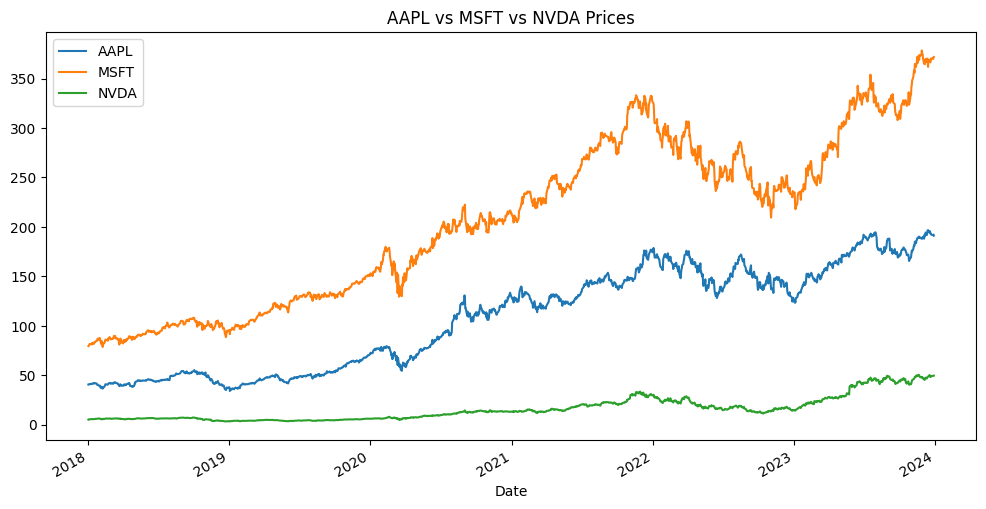

In [4]:
data = pd.DataFrame({"AAPL": aapl, "MSFT": msft, "NVDA": nvda}).dropna()
data.plot(title="AAPL vs MSFT vs NVDA Prices", figsize=(12, 6))
plt.show()

In [16]:
position = None
prices = {"AAPL" : None, "MSFT" : None}
returns = []

spread = data["AAPL"] - data["MSFT"]
zscore = (spread - spread.mean()) / spread.std()

aapl_prices = data["AAPL"]
msft_prices = data["MSFT"]


In [17]:
for date in zscore.index:
    z = zscore.loc[date]
    price_aapl = aapl_prices.loc[date]
    price_msft = msft_prices.loc[date]
    if position == None:
        if z > 1.5:
            print("short AAPL, long MSFT")
            prices["AAPL"] = price_aapl
            prices["MSFT"] = msft_prices
            position = "short"
        elif z < 1.5:
            print("long AAPL, short MSFT")
            prices["AAPL"] = price_aapl
            prices["MSFT"] = msft_prices
            position = "long"
        returns.append(0) # no realized return yet
    else:
        if (abs(z) < 1.0):
            spread_entry = prices["AAPL"] - prices["MSFT"]
            spread_exit = price_aapl - price_msft
            direction = 1 if position == "long" else -1
            trade_return = (spread_exit - spread_entry) * direction
            returns.append(trade_return)

            position = None
            prices = {'AAPL': None, 'MSFT': None}
        else:
            returns.append(0)

            

short AAPL, long MSFT
long AAPL, short MSFT
long AAPL, short MSFT
long AAPL, short MSFT
long AAPL, short MSFT
long AAPL, short MSFT
long AAPL, short MSFT
long AAPL, short MSFT
long AAPL, short MSFT
long AAPL, short MSFT
long AAPL, short MSFT
long AAPL, short MSFT
long AAPL, short MSFT
long AAPL, short MSFT
long AAPL, short MSFT
long AAPL, short MSFT
long AAPL, short MSFT
long AAPL, short MSFT
long AAPL, short MSFT
long AAPL, short MSFT
long AAPL, short MSFT
long AAPL, short MSFT
long AAPL, short MSFT
long AAPL, short MSFT
long AAPL, short MSFT
long AAPL, short MSFT
long AAPL, short MSFT
long AAPL, short MSFT
long AAPL, short MSFT
long AAPL, short MSFT
long AAPL, short MSFT
long AAPL, short MSFT
long AAPL, short MSFT
long AAPL, short MSFT
long AAPL, short MSFT
long AAPL, short MSFT
long AAPL, short MSFT
long AAPL, short MSFT
long AAPL, short MSFT
long AAPL, short MSFT
long AAPL, short MSFT
long AAPL, short MSFT
long AAPL, short MSFT
long AAPL, short MSFT
long AAPL, short MSFT
long AAPL,